In [2]:
import pandas as pd
import numpy as np
import intake as it
import xarray as xr

In [27]:
from dask.distributed import Client
import urllib

In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
# helper functions
def JD(year,month,day):
    "converts to day of year"
    t = time.mktime((year,month,day,0,0,0,0,0,0))
    return int(time.gmtime(t)[7])

def pad(number, length):
    "takes number, cast to string with padded zeros"
    while len(str(number)) < length:
        number = '0' + str(number)
        pad(number, length)
    return number


In [6]:
cd ../..

/home/espg/software/GeoStacks


In [29]:
urllib.request.urlretrieve ("https://landsat.usgs.gov/landsat/metadata_service/bulk_metadata_files/LANDSAT_OT_C2_L2.csv.gz",
                            "./sensors/LANDSAT_OT_C2_L2.csv.gz")

('./sensors/LANDSAT_OT_C2_L2.csv.gz',
 <http.client.HTTPMessage at 0x7f58c43939a0>)

In [30]:
!du -csh ./sensors/LANDSAT_OT_C2_L2.csv.gz

226M	./sensors/LANDSAT_OT_C2_L2.csv.gz
226M	total


In [31]:
l8meta = pd.read_csv('./sensors/LANDSAT_OT_C2_L2.csv.gz')

In [32]:
l8meta

,Browse Link,Display ID,Ordering ID,Landsat Product Identifier L2,Landsat Product Identifier L1,Landsat Scene Identifier,Date Acquired,Collection Category,Collection Number,WRS Path,...,Scene Center Latitude,Scene Center Longitude,Corner Upper Left Latitude,Corner Upper Left Longitude,Corner Upper Right Latitude,Corner Upper Right Longitude,Corner Lower Left Latitude,Corner Lower Left Longitude,Corner Lower Right Latitude,Corner Lower Right Longitude
0,https://landsatlook.usgs.gov/gen-browse?size=r...,LC08_L2SP_220079_20210407_20210415_02_T1,LC82200792021097LGN00,LC08_L2SP_220079_20210407_20210415_02_T1,LC08_L1TP_220079_20210407_20210415_02_T1,LC82200792021097LGN00,2021/04/07,T1,2,220,...,-27.43163,-49.09671,-26.38121,-50.28324,-26.35041,-47.94513,-28.50984,-50.26934,-28.47613,-47.88603
1,https://landsatlook.usgs.gov/gen-browse?size=r...,LC08_L2SP_015044_20210411_20210416_02_T1,LC80150442021101LGN00,LC08_L2SP_015044_20210411_20210416_02_T1,LC08_L1TP_015044_20210411_20210416_02_T1,LC80150442021101LGN00,2021/04/11,T1,2,15,...,23.11256,-81.11828,24.15636,-82.24516,24.15813,-79.99498,22.05118,-82.22590,22.05278,-80.01053
2,https://landsatlook.usgs.gov/gen-browse?size=r...,LC08_L2SP_190038_20210405_20210409_02_T1,LC81900382021095LGN00,LC08_L2SP_190038_20210405_20210409_02_T1,LC08_L1TP_190038_20210405_20210409_02_T1,LC81900382021095LGN00,2021/04/05,T1,2,190,...,31.74230,10.67792,32.79352,9.48167,32.76059,11.91191,30.70136,9.47096,30.67099,11.84726
3,https://landsatlook.usgs.gov/gen-browse?size=r...,LC08_L2SP_017061_20210409_20210416_02_T2,LC80170612021099LGN00,LC08_L2SP_017061_20210409_20210416_02_T2,LC08_L1GT_017061_20210409_20210416_02_T2,LC80170612021099LGN00,2021/04/09,T2,2,17,...,-1.44649,-89.60636,-0.40089,-90.62829,-0.40155,-88.58420,-2.49471,-90.63163,-2.49879,-88.58566
4,https://landsatlook.usgs.gov/gen-browse?size=r...,LC08_L2SP_118032_20210413_20210423_02_T1,LC81180322021103LGN00,LC08_L2SP_118032_20210413_20210423_02_T1,LC08_L1TP_118032_20210413_20210423_02_T1,LC81180322021103LGN00,2021/04/13,T1,2,118,...,40.33262,124.40979,41.38862,123.05502,41.35442,125.80561,39.28315,123.05334,39.25139,125.71987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1761391,https://landsatlook.usgs.gov/gen-browse?size=r...,LC08_L2SP_151006_20130325_20200912_02_T2,LC81510062013084LGN02,LC08_L2SP_151006_20130325_20200912_02_T2,LC08_L1TP_151006_20130325_20200912_02_T2,LC81510062013084LGN02,2013/03/25,T2,2,151,...,75.90217,104.63689,77.00398,99.40320,77.01973,109.80688,74.68509,100.23650,74.69837,109.09025
1761392,https://landsatlook.usgs.gov/gen-browse?size=r...,LC08_L2SP_001072_20130323_20200912_02_T1,LC80010722013082LGN03,LC08_L2SP_001072_20130323_20200912_02_T1,LC08_L1TP_001072_20130323_20200912_02_T1,LC80010722013082LGN03,2013/03/23,T1,2,1,...,-17.34426,-68.05094,-16.35404,-69.09738,-16.34472,-67.01637,-18.34718,-69.09843,-18.33666,-66.99484
1761393,https://landsatlook.usgs.gov/gen-browse?size=r...,LC08_L2SP_097013_20130324_20201021_02_T2,LC80970132013083LGN02,LC08_L2SP_097013_20130324_20201021_02_T2,LC08_L1TP_097013_20130324_20201021_02_T2,LC80970132013083LGN02,2013/03/24,T2,2,97,...,66.93907,172.29333,68.00919,169.45158,67.96168,175.24649,65.85699,169.58231,65.81416,174.88897
1761394,https://landsatlook.usgs.gov/gen-browse?size=r...,LC08_L2SP_033043_20130318_20200913_02_T1,LC80330432013077LGN02,LC08_L2SP_033043_20130318_20200913_02_T1,LC08_L1TP_033043_20130318_20200913_02_T1,LC80330432013077LGN02,2013/03/18,T1,2,33,...,24.55321,-109.22543,25.54427,-110.30322,25.51764,-108.12167,23.56920,-110.31405,23.54489,-108.16634


In [38]:
cat = it.open_catalog("./sensors/ls8.yaml")

In [39]:
cat

ls8:
  args:
    path: ./sensors/ls8.yaml
  description: ''
  driver: intake.catalog.local.YAMLFileCatalog
  metadata: {}


In [40]:
cat.landsat8aws()

landsat8aws:
  args:
    chunks:
      x: 512
      y: 512
    storage_options:
      anon: true
    urlpath: http://landsat-pds.s3.amazonaws.com/L8/006/013/LC80060132014195LGN00/LC80060132014195LGN00_B2.TIF
  description: Landsat AWS Public Access
  driver: intake_xarray.raster.RasterIOSource
  metadata:
    catalog_dir: /home/espg/software/GeoStacks/./sensors/


In [10]:
cat.landsat8aws(path="23") # Should fail!

landsat8aws:
  args:
    storage_options:
      anon: true
    urlpath: http://landsat-pds.s3.amazonaws.com/L8/23/013/LC8230132014195LGN00/LC8230132014195LGN00_B2.TIF
  description: Landsat AWS Public Access
  driver: intake_xarray.raster.RasterIOSource
  metadata:
    catalog_dir: /home/espg/software/GeoStacks/./


In [49]:
ds = cat.landsat8aws().to_dask()

In [50]:
ds

,Array,Chunk
Bytes,137.98 MB,524.29 kB
Shape,"(1, 8341, 8271)","(1, 512, 512)"
Count,290 Tasks,289 Chunks
Type,uint16,numpy.ndarray


In [52]:
ds.x[0:3]

<xarray.DataArray 'x' (x: 3)>
array([511800., 511830., 511860.])
Coordinates:
  * x        (x) float64 5.118e+05 5.118e+05 5.119e+05

In [54]:
idx = (l8meta['WRS Path'] == 6) * (l8meta['WRS Row'] == 13)

/nix/store/l923jgjs0jzkdan7i7p3hmlacfmypdd3-python3-3.8.9-env/lib/python3.8/site-packages/pandas/core/computation/expressions.py:204: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(


In [60]:
l8meta[idx][80:100]

,Browse Link,Display ID,Ordering ID,Landsat Product Identifier L2,Landsat Product Identifier L1,Landsat Scene Identifier,Date Acquired,Collection Category,Collection Number,WRS Path,...,Scene Center Latitude,Scene Center Longitude,Corner Upper Left Latitude,Corner Upper Left Longitude,Corner Upper Right Latitude,Corner Upper Right Longitude,Corner Lower Left Latitude,Corner Lower Left Longitude,Corner Lower Right Latitude,Corner Lower Right Longitude
1296896,https://landsatlook.usgs.gov/gen-browse?size=r...,LC08_L2SP_006013_20150717_20200908_02_T1,LC80060132015198LGN02,LC08_L2SP_006013_20150717_20200908_02_T1,LC08_L1TP_006013_20150717_20200908_02_T1,LC80060132015198LGN02,2015/07/17,T1,2,6,...,66.93927,-47.89125,68.08349,-50.71671,67.96663,-44.79037,65.84448,-50.74158,65.73955,-45.33180
1309698,https://landsatlook.usgs.gov/gen-browse?size=r...,LC08_L2SP_006013_20150701_20200909_02_T1,LC80060132015182LGN01,LC08_L2SP_006013_20150701_20200909_02_T1,LC08_L1TP_006013_20150701_20200909_02_T1,LC80060132015182LGN01,2015/07/01,T1,2,6,...,66.93936,-47.88000,68.08347,-50.70231,67.96609,-44.77613,65.84446,-50.72844,65.73907,-45.31878
1314441,https://landsatlook.usgs.gov/gen-browse?size=r...,LC08_L2SP_006013_20150615_20201015_02_T1,LC80060132015166LGN01,LC08_L2SP_006013_20150615_20201015_02_T1,LC08_L1TP_006013_20150615_20201015_02_T1,LC80060132015166LGN01,2015/06/15,T1,2,6,...,66.93929,-47.88317,68.08348,-50.70951,67.96609,-44.77613,65.84447,-50.73501,65.73907,-45.31878
1322520,https://landsatlook.usgs.gov/gen-browse?size=r...,LC08_L2SP_006013_20150530_20200909_02_T1,LC80060132015150LGN01,LC08_L2SP_006013_20150530_20200909_02_T1,LC08_L1TP_006013_20150530_20200909_02_T1,LC80060132015150LGN01,2015/05/30,T1,2,6,...,66.93909,-47.87006,68.08345,-50.69511,67.96582,-44.76900,65.84445,-50.72187,65.73882,-45.31227
1332227,https://landsatlook.usgs.gov/gen-browse?size=r...,LC08_L2SP_006013_20150514_20201015_02_T1,LC80060132015134LGN01,LC08_L2SP_006013_20150514_20201015_02_T1,LC08_L1TP_006013_20150514_20201015_02_T1,LC80060132015134LGN01,2015/05/14,T1,2,6,...,66.93900,-48.00616,68.08097,-50.83917,67.96823,-44.90508,65.84194,-50.85329,65.74072,-45.43658
1342679,https://landsatlook.usgs.gov/gen-browse?size=r...,LC08_L2SP_006013_20150428_20200909_02_T2,LC80060132015118LGN01,LC08_L2SP_006013_20150428_20200909_02_T2,LC08_L1GT_006013_20150428_20200909_02_T2,LC80060132015118LGN01,2015/04/28,T2,2,6,...,66.93928,-48.02290,68.08098,-50.85357,67.96902,-44.92646,65.84195,-50.86643,65.74143,-45.45611
1353099,https://landsatlook.usgs.gov/gen-browse?size=r...,LC08_L2SP_006013_20150412_20201016_02_T1,LC80060132015102LGN01,LC08_L2SP_006013_20150412_20201016_02_T1,LC08_L1TP_006013_20150412_20201016_02_T1,LC80060132015102LGN01,2015/04/12,T1,2,6,...,66.93935,-48.00109,68.08365,-50.83195,67.97090,-44.90438,65.84193,-50.84672,65.74072,-45.43658
1369081,https://landsatlook.usgs.gov/gen-browse?size=r...,LC08_L2SP_006013_20150327_20200909_02_T1,LC80060132015086LGN01,LC08_L2SP_006013_20150327_20200909_02_T1,LC08_L1TP_006013_20150327_20200909_02_T1,LC80060132015086LGN01,2015/03/27,T1,2,6,...,66.93896,-47.98102,68.08093,-50.81036,67.96743,-44.88371,65.84191,-50.82701,65.74000,-45.41704
1473571,https://landsatlook.usgs.gov/gen-browse?size=r...,LC08_L2SP_006013_20140916_20200910_02_T1,LC80060132014259LGN01,LC08_L2SP_006013_20140916_20200910_02_T1,LC08_L1TP_006013_20140916_20200910_02_T1,LC80060132014259LGN01,2014/09/16,T1,2,6,...,66.93933,-47.90406,68.08352,-50.73112,67.96717,-44.80462,65.84450,-50.75472,65.74004,-45.34482
1487562,https://landsatlook.usgs.gov/gen-browse?size=r...,LC08_L2SP_006013_20140831_20200911_02_T1,LC80060132014243LGN01,LC08_L2SP_006013_20140831_20200911_02_T1,LC08_L1TP_006013_20140831_20200911_02_T1,LC80060132014243LGN01,2014/08/31,T1,2,6,...,66.93904,-47.90225,68.08352,-50.73112,67.96690,-44.79750,65.84450,-50.75472,65.73979,-45.33831


In [102]:
corners, contains, _,_,_ = representation(radians(-47.89161), 
                                          radians(66.93924), 
                                          means[12]*-1,
                                          len_lat=180, 
                                          len_lon=185)
means[12]

22.661778193079652

In [100]:
# 68.08349
degrees(corners)

array([[-44.92747536,  66.96447589],
       [-47.94838186,  68.0996736 ],
       [-47.83999524,  65.77878797],
       [-50.84295166,  66.85892587]])

In [103]:
# 68.08349
degrees(corners)

array([[-44.92747536,  66.96447589],
       [-47.94838186,  68.0996736 ],
       [-47.83999524,  65.77878797],
       [-50.84295166,  66.85892587]])

In [61]:
l8meta.iloc[1529091]

Browse Link                      https://landsatlook.usgs.gov/gen-browse?size=r...
Display ID                                LC08_L2SP_006013_20140714_20200911_02_T1
Ordering ID                                                  LC80060132014195LGN01
Landsat Product Identifier L2             LC08_L2SP_006013_20140714_20200911_02_T1
Landsat Product Identifier L1             LC08_L1TP_006013_20140714_20200911_02_T1
Landsat Scene Identifier                                     LC80060132014195LGN01
Date Acquired                                                           2014/07/14
Collection Category                                                             T1
Collection Number                                                                2
WRS Path                                                                         6
WRS Row                                                                         13
Target WRS Path                                                                  6
Targ

In [65]:
ds.x[0:3]

<xarray.DataArray 'x' (x: 3)>
array([511800., 511830., 511860.])
Coordinates:
  * x        (x) float64 5.118e+05 5.118e+05 5.119e+05

In [62]:
ds

,Array,Chunk
Bytes,137.98 MB,524.29 kB
Shape,"(1, 8341, 8271)","(1, 512, 512)"
Count,290 Tasks,289 Chunks
Type,uint16,numpy.ndarray


In [63]:
ds2 = cat.landsat8aws(row='045',path='022').to_dask()

In [64]:
ds2

,Array,Chunk
Bytes,117.83 MB,524.29 kB
Shape,"(1, 7761, 7591)","(1, 512, 512)"
Count,241 Tasks,240 Chunks
Type,uint16,numpy.ndarray


In [13]:
ds

<xarray.DataArray (band: 1, y: 8341, x: 8271)>
array([[[0, 0, ..., 0, 0],
        [0, 0, ..., 0, 0],
        ...,
        [0, 0, ..., 0, 0],
        [0, 0, ..., 0, 0]]], dtype=uint16)
Coordinates:
  * band     (band) int64 1
  * y        (y) float64 7.552e+06 7.552e+06 7.552e+06 ... 7.302e+06 7.302e+06
  * x        (x) float64 5.118e+05 5.118e+05 5.119e+05 ... 7.599e+05 7.599e+05
Attributes:
    transform:      (30.0, 0.0, 511785.0, 0.0, -30.0, 7552515.0)
    crs:            +init=epsg:32622
    res:            (30.0, 30.0)
    is_tiled:       1
    nodatavals:     (nan,)
    scales:         (1.0,)
    offsets:        (0.0,)
    AREA_OR_POINT:  Point

In [35]:
ds.x[0:4]

<xarray.DataArray 'x' (x: 4)>
array([396900., 396930., 396960., 396990.])
Coordinates:
  * x        (x) float64 3.969e+05 3.969e+05 3.97e+05 3.97e+05

In [44]:
ds2

,Array,Chunk
Bytes,137.98 MB,524.29 kB
Shape,"(1, 8341, 8271)","(1, 512, 512)"
Count,290 Tasks,289 Chunks
Type,uint16,numpy.ndarray


In [48]:
ds

,Array,Chunk
Bytes,2.42 GB,2.10 MB
Shape,"(4, 8701, 8691)","(1, 512, 512)"
Count,16462 Tasks,3332 Chunks
Type,float64,numpy.ndarray


In [15]:
client = Client(processes=True, n_workers=4, threads_per_worker=1)
client

Client Scheduler: tcp://127.0.0.1:38399 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 4 Cores: 4 Memory: 16.55 GB


In [45]:

date_range = pd.date_range(start='2014-01-01', end='2014-04-01')


# Function for cleaning the data: rename band -> time and create datetime object
def preprocess(ds, value):
    ds["band"] = [value.to_numpy()]
    ds = ds.rename({'band': 'time'})
    return ds


def retrieve_dataset(value):
    try:
        doy_ = pad(JD(value.year, value.month, value.day ), 3)
        ds = cat.landsat8aws(year=value.year, doy=doy_, path="003", row="010").to_dask()
        return preprocess(ds, value)
    except Exception:
        return None


datasets = client.map(retrieve_dataset, date_range)
datasets = client.gather(datasets)
datasets = [dataset for dataset in datasets if dataset is not None]
ds = xr.concat(datasets, dim='time', compat='override', coords='minimal').squeeze()
ds

/nix/store/l923jgjs0jzkdan7i7p3hmlacfmypdd3-python3-3.8.9-env/lib/python3.8/site-packages/dask/array/core.py:4292: PerformanceWarning: Increasing number of chunks by factor of 17
  result = blockwise(
/nix/store/l923jgjs0jzkdan7i7p3hmlacfmypdd3-python3-3.8.9-env/lib/python3.8/site-packages/dask/array/core.py:4292: PerformanceWarning: Increasing number of chunks by factor of 17
  result = blockwise(
/nix/store/l923jgjs0jzkdan7i7p3hmlacfmypdd3-python3-3.8.9-env/lib/python3.8/site-packages/dask/array/core.py:4292: PerformanceWarning: Increasing number of chunks by factor of 17
  result = blockwise(
/nix/store/l923jgjs0jzkdan7i7p3hmlacfmypdd3-python3-3.8.9-env/lib/python3.8/site-packages/dask/array/core.py:4292: PerformanceWarning: Increasing number of chunks by factor of 17
  result = blockwise(


,Array,Chunk
Bytes,2.42 GB,2.10 MB
Shape,"(4, 8701, 8691)","(1, 512, 512)"
Count,16462 Tasks,3332 Chunks
Type,float64,numpy.ndarray


In [25]:
import hvplot.xarray

width = 800
height = 400
widget_type = 'scrubber'
widget_location = 'bottom'


ds.hvplot.image(
    rasterize=True,
    aspect='equal',
    x="x",
    y="y",
    cmap='gray',
    clim=(4000, 6500),
    width=width,
    height=height,
    widget_type=widget_type,
    widget_location=widget_location,
)

Column
    [0] HoloViews(DynamicMap, widget_location='bottom', widget_type='scrubber')
    [1] Row
        [0] HSpacer()
        [1] WidgetBox
            [0] Player(end=3, width=550)
        [2] HSpacer()

(array([33684860.,        0.,        0.,        0.,        0.,        0.,
               0.,        0.,        0., 41674501.]),
 array([   0. ,  548.4, 1096.8, 1645.2, 2193.6, 2742. , 3290.4, 3838.8,
        4387.2, 4935.6, 5484. ]),
 <BarContainer object of 10 artists>)

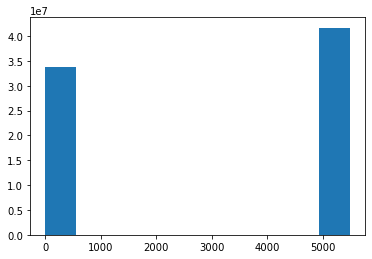

In [22]:
hist(ds.data[0].ravel())

In [ ]:
imshow(ds.data[0],vmax= , vmin= )

In [57]:
temp = date_range[0]

In [59]:
temp.to_numpy()

numpy.datetime64('2014-01-01T00:00:00.000000000')

In [47]:
ds = cat.landsat8aws()

In [55]:
ds2.attrs['date'] = 'test'

In [46]:
preprocess(cat.landsat8aws())

AttributeError: 'RasterIOSource' object has no attribute 'attrs'

In [68]:
ls8 = pd.read_excel('./LS8_cornerPts.xlsx')

In [69]:
ls8

,path,row,lat_CTR,lon_CTR,lat_UL,lon_UL,lat_UR,lon_UR,lat_LL,lon_LL,lat_LR,lon_LR
0,1,1,80.774791,3.210620,81.923,5.424,80.307,9.947,81.107,-4.125,79.617,1.472
1,1,2,80.021757,-4.274059,81.203,-3.207,79.699,2.307,80.211,-11.194,78.838,-5.129
2,1,3,79.129883,-10.647337,80.322,-10.432,78.936,-4.404,79.196,-17.039,77.937,-10.831
3,1,4,78.130377,-16.029408,79.320,-16.409,78.048,-10.207,78.095,-21.873,76.940,-15.728
4,1,5,77.048078,-20.572231,78.227,-21.351,77.061,-15.193,76.927,-25.898,75.867,-19.930
...,...,...,...,...,...,...,...,...,...,...,...,...
57778,233,244,81.352691,28.155956,81.848,35.646,80.245,30.979,82.435,24.538,80.730,21.560
57779,233,245,81.718750,18.566867,82.387,25.777,80.691,22.590,82.696,13.461,80.942,12.495
57780,233,246,81.844418,8.404287,82.680,14.794,80.929,13.576,82.680,2.015,80.929,3.233
57781,233,247,81.718750,-1.758293,82.696,3.347,80.942,4.314,82.387,-8.969,80.691,-5.781


In [70]:
def bearing(lat1,lon1, lat2,lon2):
    """assumes lat/lon values are in decimal degrees
    Return is in degrees Clockwise from North"""
    lat1 = lat1*np.pi/180.
    lat2 = lat2*np.pi/180.
    lon1 = lon1*np.pi/180.
    lon2 = lon2*np.pi/180.
    # could probably just use np.radians instead...
    
    X = np.cos(lat2) * np.sin(lon2 - lon1)
    Y = np.cos(lat1) * np.sin(lat2) - np.sin(lat1)*np.cos(lat2)*np.cos(lon2-lon1)
    
    b = np.arctan2(X,Y)
    return(np.degrees(b))
    

# Calculate Bearing per Row as Average

Note that the `asending` and `dsending` varibles refer to direction of the moving window with regard to bearing calculation, ***not*** asending/desending paths of the satellite orbit.

In [71]:
asending = bearing(ls8.lat_CTR[248:497].values, ls8.lon_CTR[248:497].values, 
                   ls8.lat_CTR[247:496].values, ls8.lon_CTR[247:496].values)

# 180 degree offset
dsending = bearing(ls8.lat_CTR[247:496].values, ls8.lon_CTR[247:496].values, 
                   ls8.lat_CTR[248:497].values, ls8.lon_CTR[248:497].values) + 180.

In [72]:
asending

array([-68.5471715 ,  55.248417  ,  49.17526883,  44.09328389,
        39.85039339,  36.29923427,  33.31181408,  30.78244302,
        28.62611416,  26.77528963,  25.17616332,  23.78605686,
        22.5706903 ,  21.50260394,  20.55943694,  19.72296397,
        18.97820948,  18.31276116,  17.71623446,  17.17996343,
        16.69656385,  16.25982519,  15.86436449,  15.50564017,
        15.17964912,  14.88296161,  14.61261588,  14.36595582,
        14.14063092,  13.93474514,  13.74633662,  13.57391654,
        13.41603446,  13.27144632,  13.13894197,  13.01760301,
        12.90641899,  12.80469323,  12.7115637 ,  12.62639643,
        12.54861329,  12.4776537 ,  12.41298943,  12.35424556,
        12.30092835,  12.25280122,  12.20934173,  12.17046202,
        12.13574213,  12.10501573,  12.07807212,  12.05467635,
        12.03471746,  12.01800941,  12.00448301,  11.99396665,
        11.98647591,  11.98182633,  11.98006038,  11.9810846 ,
        11.98499793,  11.99169398,  12.00124002,  12.01

In [73]:
dsending

array([277.06949371,  62.62869291,  55.4437581 ,  49.3700838 ,
        44.28736325,  40.04362026,  36.49156234,  33.50305564,
        30.97243122,  28.81482407,  26.96250799,  25.3618494 ,
        23.97001047,  22.75286609,  21.68284137,  20.73761875,
        19.89898867,  19.15197035,  18.484121  ,  17.8851154 ,
        17.34622209,  16.86013099,  16.42055213,  16.02219777,
        15.66043807,  15.33132317,  15.03145092,  14.7577942 ,
        14.50768366,  14.27895692,  14.06941669,  13.87737628,
        13.7012122 ,  13.53953013,  13.39098813,  13.25455449,
        13.12911696,  13.0138918 ,  12.90793717,  12.81054978,
        12.72108995,  12.63894214,  12.56352763,  12.49442853,
        12.43110965,  12.37329958,  12.32044114,  12.27241842,
        12.22878263,  12.18934287,  12.15386506,  12.12209253,
        12.09389429,  12.06906537,  12.04751887,  12.02906604,
        12.01370656,  12.00124002,  11.99169398,  11.98496002,
        11.98112249,  11.98006038,  11.98182633,  11.98

In [74]:
means = np.mean([asending[0:-1], dsending[1:]], axis=0)
# Replace invalid first value with non-averaged valid value
means[0] = dsending[1]
# Same for last, but on other array
means[-1] = asending[-2]
len(means)

248

In [75]:
means

array([ 62.62869291,  55.34608755,  49.27267632,  44.19032357,
        39.94700683,  36.39539831,  33.40743486,  30.87743712,
        28.72046912,  26.86889881,  25.26900636,  23.87803367,
        22.66177819,  21.59272266,  20.64852785,  19.81097632,
        19.06508991,  18.39844108,  17.80067493,  17.26309276,
        16.77834742,  16.34018866,  15.94328113,  15.58303912,
        15.25548615,  14.95720626,  14.68520504,  14.43681974,
        14.20979392,  14.00208091,  13.81185645,  13.63756437,
        13.4777823 ,  13.33121723,  13.19674823,  13.07335998,
        12.9601554 ,  12.8563152 ,  12.76105674,  12.67374319,
        12.59377772,  12.52059066,  12.45370898,  12.39267761,
        12.33711396,  12.28662118,  12.24088008,  12.19962232,
        12.1625425 ,  12.12944039,  12.10008232,  12.07428532,
        12.05189141,  12.03276414,  12.01677452,  12.0038366 ,
        11.99385796,  11.98676015,  11.9825102 ,  11.98110355,
        11.98252915,  11.98676015,  11.99383911,  12.00

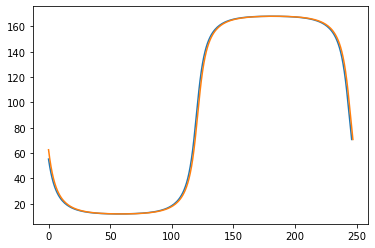

In [76]:
plot(bearing(ls8.lat_CTR[1:248].values, ls8.lon_CTR[1:248].values, 
        ls8.lat_CTR[0:247].values, ls8.lon_CTR[0:247].values))
plot(means)

# Jonathan's Contains Code

Let $C$ be the center point and $\theta$ is the tilt angle there is a corresponding "unit tangent vector" to the sphere with that tilt. Call this vector $v$.

To move $C$ along $v$ a distance $D$ in a sphere of radius $R$ is something like

$$
P_1  = \cos(A) \cdot C + R\cdot \sin (A) \cdot v
$$
where $A$ corresponds to 90km in radians. This is `midpt_1` in code below. Moving in the direction $-v$
yields
$$
P_2  = \cos(A) \cdot C - R\cdot \sin (A) \cdot v
$$
which is referred to as `midpt_2` below.

In [77]:
import numpy as np
import functools 
lat_deg, lon_deg = 77.875, -20.975
lat, lon, R, theta = lat_deg*(2*np.pi)/360, lon_deg*(2*np.pi)/360, 6371, -70 * 2 * np.pi / 360
boulder_lat, boulder_lon = lat, lon
x, y, z = (R * np.cos(lat) * np.sin(lon), R * np.cos(lat) * np.cos(lon), R * np.sin(lat))
C = np.array([x,y,z])

## Computing $v$ from $\theta$

At a point $C=[x,y,z]$, a tilt can be thought of as moving through lat and lon along a line with direction vector $d=(d_lon, d_lat)$, so we have 
in parameters $t$
$$
x(t), y(t), z(t) = (R * \cos(lat_0 + t dlat) * \cos(lon_0 + t dlon), R * \cos(lat_0 + t dlat) * \sin(lon_0 + t dlon), R * \sin(lat_0 + t dlat))
$$

Differentiating with respect to $t$
(ignoring the $R$ scaling as we want normalized $v$) we see $v$ is parallel
to 
$$
R\cdot (-\sin (lat_0) \cos(lon_0) dlat - \cos(lat_0) \sin(lon_0) dlon, -\sin(lat_0) \sin(lon_0) dlat + \cos(lat_0) \cos(lon_0) dlon, \cos(lat_0) dlat)
$$

In [78]:
dlat, dlon = np.sin(theta), np.cos(theta)
v = np.array([-np.sin(lat) * np.sin(lon) * dlat + np.cos(lat) * np.cos(lon) * dlon,
              -np.sin(lat) * np.cos(lon) * dlat - np.cos(lat) * np.sin(lon) * dlon,
              np.cos(lat) * dlat])
v /= np.linalg.norm(v) 
np.sum(v*C)

2.2737367544323206e-13

The angle $A$ is 
$$
\frac{A}{2\pi} = \frac{90km}{2 \pi \cdot 6371km}
$$

In [79]:
A = 90/R
A

0.014126510751844295

In [80]:
midpt_1 = np.cos(A) * C + R * np.sin(A) * v
np.linalg.norm(midpt_1 - C), np.dot(midpt_1, C) / R**2, np.cos(A)

(89.99925165821908, 0.9999002225062911, 0.9999002225062912)

To find next corner, we move $\perp$ to $v$.
That direction can be found by
$$
v \times P_1.
$$
Let $v^{\perp}$ be the unit vector in this direction.

In [81]:
v_perp = np.cross(midpt_1, v) # == np.cross(C, v)
v_perp /= np.linalg.norm(v_perp)
v_perp

array([-0.95769775, -0.28733023, -0.01601127])

We will then move 92.5km from $P_1$ in the direction 
$$
P_2 = \cos(B) \cdot P_1 + R \cdot \sin(B) \cdot v^{\perp}
$$
where
$$
\frac{B}{2\pi} = \frac{92.5km}{6371km}
$$

In [82]:
B = 92.5/6371
corners = [np.cos(B) * midpt_1 + R * np.sin(B) * v_perp]
corners.append(np.cos(B) * midpt_1 - R * np.sin(B) * v_perp)

v_perp = np.cross(midpt_1, v) # == np.cross(C, v)
v_perp /= np.linalg.norm(v_perp)
v_perp
midpt_2 = np.cos(A) * C - R * np.sin(A) * v
corners.append(np.cos(B) * midpt_2 + R * np.sin(B) * v_perp)
corners.append(np.cos(B) * midpt_2 - R * np.sin(B) * v_perp)

corners

[array([-592.50445431, 1307.05760939, 6207.2683104 ]),
 array([-415.33659543, 1360.21183452, 6210.23029184]),
 array([-542.51096281, 1138.32435259, 6244.96121073]),
 array([-365.34310393, 1191.47857771, 6247.92319217])]

In [18]:
[np.linalg.norm(corner) for corner in corners]

[6370.999999999999, 6370.999999999999, 6371.000000000001, 6371.0]

We can find another corner
$$
\cos(A') \cdot P_1 - R \cdot \sin(A') \cdot v^{\perp}
$$ 
and similarly other corners.

### Now convert back to lat lon

In [19]:
lat_degs = [np.arcsin(z_ / R) / (2 * np.pi) * 360 for x_, y_, z_ in corners]
lat_degs

[76.98228647840101, 77.10107655680675, 78.58424793008591, 78.71962386426219]

In [20]:
lon_degs = [np.arctan2(x_ / R, y_ / R) / (2 * np.pi) * 360 for x_, y_, z_ in corners]
lon_degs

[-24.385340987196802,
 -16.979893384135025,
 -25.481877244698317,
 -17.047111911561473]

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt

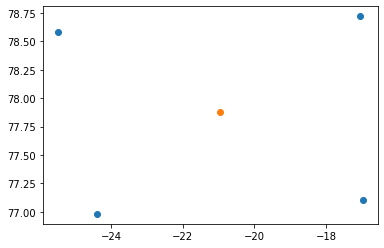

In [22]:
plt.scatter(lon_degs, lat_degs)
plt.scatter([lon_deg], [lat_deg])

### A representation of the scene that implements `contains`

In [101]:
def representation(center_lon,  # in radians
                   center_lat,  # in radians
                   instrument_tilt, # in degrees, rotation clockwise
                   len_lon=180, # extent in km
                   len_lat=185, # extent in km
                   R=6371):      # "radius" of earth

    tilt_deg = radians(instrument_tilt)

    #tilt_deg = instrument_tilt * 2 * np.pi / 360

    x, y, z = (R * np.cos(center_lat) *
               np.sin(center_lon),
               R * np.cos(center_lat) *
               np.cos(center_lon), R * np.sin(center_lat))
    C = np.array([x,y,z]) # center of scene

    dlat, dlon = np.sin(-tilt_deg), np.cos(-tilt_deg)
    dir_lon = np.array([-np.sin(center_lat) * np.sin(center_lon) * dlat +
                       np.cos(center_lat) * np.cos(center_lon) * dlon,
                       -np.sin(center_lat) * np.cos(center_lon) * dlat -
                       np.cos(center_lat) * np.sin(center_lon) * dlon,
                       np.cos(center_lat) * dlat])
    dir_lon /= np.linalg.norm(dir_lon) 

    A = len_lon / 2 / R
    midpt_1 = np.cos(A) * C + R * np.sin(A) * dir_lon

    dir_lat = np.cross(midpt_1, dir_lon)
    dir_lat /= np.linalg.norm(dir_lat)

    B = len_lat/ 2 / R

    corners = [np.cos(B) * midpt_1 + R * np.sin(B) * dir_lat]
    corners.append(np.cos(B) * midpt_1 - R * np.sin(B) * dir_lat)

    midpt_2 = np.cos(A) * C - R * np.sin(A) * dir_lon
    corners.append(np.cos(B) * midpt_2 + R * np.sin(B) * dir_lat)
    corners.append(np.cos(B) * midpt_2 - R * np.sin(B) * dir_lat)
    corners = np.array(corners)
    
    corners_lon_lat = np.array([(np.arctan2(x_ / R, y_ / R),
                                 np.arcsin(z_ / R)) for x_, y_, z_ in corners])

    # now work out halfspace

    # these are the edge segmentsin lon/lat space
    supports = [corners_lon_lat[0]-corners_lon_lat[1],
                corners_lon_lat[0]-corners_lon_lat[2],
                corners_lon_lat[1]-corners_lon_lat[3],
                corners_lon_lat[2]-corners_lon_lat[3]] 

    # normals to each edge segment
    normals = np.array([(s[1],-s[0]) for s in supports])
    pts = [corners_lon_lat[0],   # a point within each edge
           corners_lon_lat[0],
           corners_lon_lat[1],
           corners_lon_lat[3]]
    bdry_values = np.array([np.sum(n * p) for n, p in zip(normals, pts)])
    center_values = [np.sum(n * [center_lon, center_lat]) for n in normals]
    center_signs = np.sign(center_values - bdry_values)

    def _check(normals, center_signs, bdry_values, lon_lat_vals):
        normal_mul = np.asarray(lon_lat_vals).dot(normals.T)
        values_ = normal_mul - bdry_values[None,:]
        signs_ = np.sign(values_) * center_signs[None,:]
        return np.squeeze(np.all(signs_ == 1, 1))

    _check = functools.partial(_check, normals, center_signs, bdry_values)
        
    return corners_lon_lat, _check, normals, bdry_values, center_signs


### What needs to be stored

- We need to store `normals`, `bdry_values` and `center_signs` for each scene.

In [24]:
corners, contains, normals, bdry_values, center_signs = representation(radians(-10.647337), 
                                                                       radians(79.129883), 
                                                                       49.27267632,
                                                                       len_lat=200, 
                                                                       len_lon=200)

### How `contains` is determined

- Function can check several query points at once....


In [25]:
def _check(normals, center_signs, bdry_values, lon_lat_vals):
    normal_mul = np.asarray(lon_lat_vals).dot(normals.T)
    values_ = normal_mul - bdry_values[None,:]
    signs_ = np.sign(values_) * center_signs[None,:]
    return np.squeeze(np.all(signs_ == 1, 1))
import functools

contains = functools.partial(_check, normals, center_signs, bdry_values)

# Comparing Landsat footprints

In [26]:
def get_corners(i):
    corners = np.zeros((4,2))
    row = ls8[i:i+1]
    corners[0,1] = row.lat_UL.values
    corners[1,1] = row.lat_UR.values
    corners[2,1] = row.lat_LL.values
    corners[3,1] = row.lat_LR.values
    corners[0,0] = row.lon_UL.values
    corners[1,0] = row.lon_UR.values
    corners[2,0] = row.lon_LL.values
    corners[3,0] = row.lon_LR.values
    return corners

In [27]:
ls8[1:2]

,path,row,lat_CTR,lon_CTR,lat_UL,lon_UL,lat_UR,lon_UR,lat_LL,lon_LL,lat_LR,lon_LR
1,1,2,80.021757,-4.274059,81.203,-3.207,79.699,2.307,80.211,-11.194,78.838,-5.129


In [28]:
get_corners(20)

array([[-49.603,  56.91 ],
       [-46.533,  56.457],
       [-50.387,  55.337],
       [-47.43 ,  54.902]])

In [29]:
scene = ls8[20:21]
# Change scene index above... need i and i+1 since pandas expects slice

corners, contains, _, _, _ = representation(radians(scene.lon_CTR.values)[0], 
                                            radians(scene.lat_CTR.values)[0], 
                                            means[scene.row.values -1][0])
np.degrees(corners)

array([[-47.93439795,  54.7937516 ],
       [-46.49480285,  56.24430481],
       [-50.44378113,  55.54622216],
       [-49.07248444,  57.02574522]])

In [30]:
# Swapping swadth dimentions...
scene = ls8[20:21]
# Change scene index above... need i and i+1 since pandas expects slice

corners1, contains, _, _, _ = representation(radians(scene.lon_CTR.values)[0], 
                                            radians(scene.lat_CTR.values)[0], 
                                            means[scene.row.values -1][0],
                                            len_lon=185,
                                            len_lat=180)
np.degrees(corners1)

array([[-47.88144507,  54.80264475],
       [-46.47993565,  56.21360348],
       [-50.46148037,  55.5763997 ],
       [-49.12827268,  57.01632719]])

In [31]:
means[20]

16.778347418472123

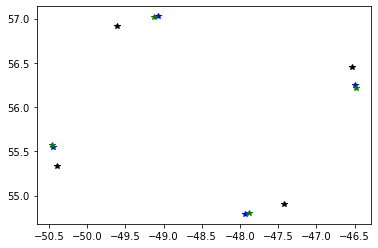

In [32]:
plot(get_corners(20)[:,0],get_corners(20)[:,1],'k*')
plot(np.degrees(corners[:,0]), 
     np.degrees(corners[:,1]), 'b*')
plot(np.degrees(corners1[:,0]), 
     np.degrees(corners1[:,1]), 'g*')
